<a href="https://colab.research.google.com/github/ollihansen90/linclassifiers/blob/main/LinClassifier_Manim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineare Klassifikation
Manim-Skripte

## Imports
(immer ausführen)

### Manim installieren
Dieser Codeblock muss beim ersten Start zwei Mal ausgeführt werden (Laufzeit muss zwischendurch einmal neugestartet werden).

Achtung: ENTWEDER nur Manim (erster Block) ODER nur ManimGL (zweiter Block, TODO: Funktioniert aktuell nicht)!

In [ ]:
# manim
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [ ]:
# manimgl
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manimgl
!pip install IPython --upgrade


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

### Style-Variablen

In [ ]:
from manim import *
import numpy as np

bg_color = BLACK  # Hex: "#000000"

coord_color = WHITE
bg_coord_color = BLUE_D
coord_label_color = GREEN_C

color1 = BLUE_C
color2 = GREEN_C
color3 = RED_C

# FONTS

standard_font = "Verdana"

title_fontsize = 40
subtitle_fontsize = 36
explain_fontsize = 24
small_fontsize = 16
mathmatrix_fontsize = 20

texXXS = 16
texXS = 22
texS = 30
texM = 40
texL = 50
texXL = 60

# TIMES

write = 1
wait = 2
fade = 0.5

# --- NEU ---
FRAME_HEIGHT = 10
CONFIG_1_1 = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0
        }
    }

Manim Community v0.15.1

## Tabelle zu Datenpunkte

Teil 1: Tabelle

In [ ]:
%%manim -ql -v WARNING TableTest

import numpy as np

class TableTest(Scene):
    
    def construct(self):
        # Farben
        self.camera.background_color = WHITE
        obj_color = BLACK
        dot_colors = [RED, GREEN, BLUE]

        # Daten
        n_hunde = 50
        dackel = [0.7, 3]
        gretriever = [3.2, 5.6]
        bernhardiner = [6.0, 7.0]
        sigma = [0.3,0.3]
        data = np.array([dackel+[0], gretriever+[1], bernhardiner+[2]])
        dackel_coord = self.generate_values(dackel, sigma, n_hunde, label=0)
        gretriever_coord = self.generate_values(gretriever, sigma, n_hunde, label=1)
        bernhardiner_coord = self.generate_values(bernhardiner, sigma, n_hunde, label=2)
        data_tail = np.concatenate((dackel_coord, gretriever_coord, bernhardiner_coord), axis=0)
        data_tail = np.random.permutation(data_tail)
        print(data.shape)
        print(data_tail.shape)

        # Tabelle 0 (nur drei Zeilen)
        t0 = MathTable(data[:,:-1],
                row_labels=[Text("Dackel"), Text("Golden Retriever"), Text("Bernhardiner")],
                col_labels=[Text("Größe", font_size=30), Text("Gewicht", font_size=30)]
            ).scale(0.8).to_edge(UP, buff=0.5).to_edge(buff=0.5).set_color(self.camera.background_color)
        self.add(t0)
        t0.get_horizontal_lines().set_color(obj_color)
        t0.get_vertical_lines().set_color(obj_color)
        entries = t0.get_entries()
        self.play(entries[2].animate.set_color(obj_color))
        self.play(entries[5].animate.set_color(obj_color))
        self.play(entries[8].animate.set_color(obj_color))
        self.play(entries[0].animate.set_color(obj_color))
        self.play(entries[1].animate.set_color(obj_color))
        self.play(*[entry.animate.set_color(obj_color) for entry in entries])
        for i, entry in enumerate(entries):
            print(i, entry)
        self.wait()
        # ----- Koordinatensystem -----
        self.play(t0.animate.scale(0.6).to_edge(UP).to_edge(RIGHT))#.shift([0,-5,0]))
        self.wait()
        self.grid = Axes(
                x_range=[0,8, 1], 
                y_range=[0,8, 1], 
                x_length=10,
                y_length=10,
                axis_config={"numbers_to_include": np.arange(0,8, 2),},
                
                tips=True
            )
        self.play(FadeIn(self.grid.set_z_index(t0.z_index-1).set_color(obj_color).scale(0.7).to_edge()))
        self.wait()

        # Befülle Koordinatensystem mit drei Punkten
        self.play(entries[2].animate.set_color(dot_colors[0]))
        t_label = self.grid.get_lines_to_point(point=self.togrid(dackel), color=obj_color)
        self.play(FadeIn(t_label), FadeIn(Dot(self.togrid(dackel), color=dot_colors[0])))
        self.wait()
        self.play(FadeOut(t_label))
        self.play(entries[5].animate.set_color(dot_colors[1]))
        self.play(FadeIn(Dot(self.togrid(gretriever), color=dot_colors[1])))
        self.wait()
        self.play(entries[8].animate.set_color(dot_colors[2]))
        self.play(FadeIn(Dot(self.togrid(bernhardiner), color=dot_colors[2])))
        self.wait()

        # ----- Große Tabelle -----
        bis = 20
        data = np.concatenate((data, data_tail), axis=0)
        data = data.round(decimals=2)
        t1 = MathTable(data[:bis,:-1],
                row_labels=[Text("Dackel"), Text("Golden Retriever"), Text("Bernhardiner")]+[Text("Hund "+str(num), font_size=30) for num in range(1,bis-2)],
                col_labels=[Text("Größe", font_size=30), Text("Gewicht", font_size=30)]
            ).scale(0.8).scale(0.6).to_edge(UP).to_edge(RIGHT).set_color(obj_color)
        entries = t1.get_entries()
        entries[2].set_color(dot_colors[0])
        entries[5].set_color(dot_colors[1])
        entries[8].set_color(dot_colors[2])
        self.play(
                    FadeOut(t0),
                    FadeIn(t1)
                )
        self.wait()

        # Fülle restliche Punkte auf
        for point in data[3:10]:
            dot = Dot().to_edge(DOWN+UP, buff=2).scale(0.5).set_color(dot_colors[int(point[-1])])
            self.add(dot)
            self.play(dot.animate.move_to(self.togrid(point)), run_time=0.2)
        self.wait()
        group = Group()
        for point in data[10:]:
            group.add(Dot(self.togrid(point)).scale(0.5).set_color(dot_colors[int(point[-1])]))
        print("n_group",len(group))
        self.play(FadeIn(group))
        self.wait()


    def togrid(self, point):
        grid_or = self.grid.get_origin()
        x_len = self.grid.get_x_unit_size()
        y_len = self.grid.get_y_unit_size()
        return [x_len*point[0]+grid_or[0], y_len*point[1]+grid_or[1],0]
        
    def generate_values(self, mu, sigma, n, label):
        output_x = mu[0]+sigma[0]*np.random.randn(n)
        fac = mu[1]/np.sqrt(mu[0])
        output_y = fac*np.sqrt(output_x)+sigma[1]*np.random.randn(n)
        output = np.column_stack((output_x, output_y, np.ones(n)*label))
        return output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in sqrt


(3, 3)
(150, 3)


0 Text('Größe')
1 Text('Gewicht')
2 Text('Dackel')
3 MathTex('0.7')
4 MathTex('3.0')
5 Text('Golden Retriever')
6 MathTex('3.2')
7 MathTex('5.6')
8 Text('Bernhardiner')
9 MathTex('6.0')
10 MathTex('7.0')


n_group 143


### Teil 2: Viele Punkte

In [ ]:
%%manim -ql -v WARNING TableTest

import numpy as np

class TableTest(Scene):
    
    def construct(self):
        self.camera.background_color = WHITE
        obj_color = BLACK
        dot_colors = [RED, GREEN, BLUE]
        n_hunde = 20
        dackel = [0.7, 3]
        gretriever = [3.2, 5.6]
        bernhardiner = [6.0, 7.0]
        sigma = [0.3,0.3]
        dackel_coord = self.generate_values(dackel, sigma, n_hunde)
        gretriever_coord = self.generate_values(gretriever, sigma, n_hunde)
        bernhardiner_coord = self.generate_values(bernhardiner, sigma, n_hunde)
        """dackel_coord = np.array(np.repeat(np.array([dackel]), n_hunde, axis=0))
        gretriever_coord = np.array(np.repeat(np.array([gretriever]), n_hunde, axis=0))
        bernhardiner_coord = np.array(np.repeat(np.array([bernhardiner]), n_hunde, axis=0))"""
        means = np.concatenate((dackel_coord, gretriever_coord, bernhardiner_coord), axis=0)
        labels = np.repeat([0,1,2],n_hunde,axis=0)
        print(labels.shape)

        data = 0.1*np.random.randn(n_hunde*3,2)+means
        data = np.column_stack((data, labels))
        data = np.random.permutation(data)
        dgb = np.array([dackel+[0], gretriever+[1], bernhardiner+[2]])
        print(dgb.shape)
        data = np.concatenate((dgb, data), axis=0)
        print(data.shape)

        data = data.round(decimals=2)
        t0 = MathTable(data[:3,:-1],
                row_labels=[Text("Dackel"), Text("Golden Retriever"), Text("Bernhardiner")],
                col_labels=[Text("Größe", font_size=30), Text("Gewicht", font_size=30)]
            ).scale(0.8).to_edge(UP, buff=0.5).to_edge(buff=0.5).set_color(obj_color)
        self.add(t0)
        self.wait()
        bis = 20
        t1 = MathTable(data[:bis,:-1],
                row_labels=[Text("Dackel"), Text("Golden Retriever"), Text("Bernhardiner")]+[Text("Hund "+str(num), font_size=30) for num in range(1,bis-2)],
                col_labels=[Text("Größe", font_size=30), Text("Gewicht", font_size=30)]
            ).scale(0.8).to_edge(UP, buff=0.5).to_edge(buff=0.5).set_color(obj_color)
        self.play(FadeIn(t1), FadeOut(t0))
        self.wait()
        self.play(t1.animate.scale(0.5).to_edge(UP).to_edge(RIGHT))#.shift([0,-5,0]))
        self.wait()
        #self.play(FadeIn(NumberPlane(x_range=[0,10], y_range=[0,10]).set_z_index(t0.z_index-1).scale(0.7).to_edge()))
        grid = Axes(
                x_range=[0,8, 1], 
                y_range=[0,8, 1], 
                x_length=10,
                y_length=10,
                axis_config={"numbers_to_include": np.arange(0,8, 2),},
                
                tips=True
            )
        self.play(FadeIn(grid.set_z_index(t0.z_index-1).set_color(obj_color).scale(0.7).to_edge()))
        self.wait()
        entries = t1.get_columns()[0][1:4]
        self.play(
                    entries[0].animate.set_color(dot_colors[0]),
                    entries[1].animate.set_color(dot_colors[1]),
                    entries[2].animate.set_color(dot_colors[2]),
                )
        self.wait()
        orig = grid.get_origin()
        print(orig)
        x_len = grid.get_x_unit_size()
        y_len = grid.get_y_unit_size()
        self.wait()
        for point in data[:10]:
            dot = Dot().to_edge(DOWN+UP, buff=2).scale(0.5).set_color(dot_colors[int(point[-1])])
            self.add(dot)
            self.play(dot.animate.move_to([orig[0]+x_len*point[0], orig[1]+y_len*point[1], 0]), run_time=0.2)
        self.wait()
        group = Group()
        for point in data[10:]:
            group.add(Dot([orig[0]+x_len*point[0], orig[1]+y_len*point[1], 0]).scale(0.5).set_color(dot_colors[int(point[-1])]))
        self.play(FadeIn(group))
        self.wait()


    def generate_values(self, mu, sigma, n):
        output_x = mu[0]+sigma[0]*np.random.randn(n)
        fac = mu[1]/np.sqrt(mu[0])
        output_y = fac*np.sqrt(output_x)+sigma[1]*np.random.randn(n)
        output = np.column_stack((output_x, output_y))
        return output

(60,)
(3, 3)
(63, 3)


[-6.32025815 -3.57605543  0.        ]


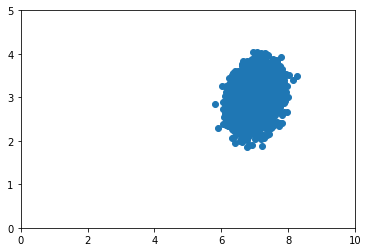

In [ ]:
import matplotlib.pyplot as plt
def generate_values(mu, sigma, n):
    output_x = mu[0]+sigma[0]*np.random.randn(n)
    fac = mu[1]/np.sqrt(mu[0])
    output_y = fac*np.sqrt(output_x)+sigma[1]*np.random.randn(n)
    output = np.column_stack((output_x, output_y))
    return output

mu = [7., 3.]
data = generate_values(mu, [0.3,0.3], 10_000)
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlim([0,10])
plt.ylim([0,5])
plt.show()

## Vektoren


In [ ]:
%%manim -ql -v WARNING VektorTest
import numpy as np

class VektorTest(Scene):
    def construct(self):
        # Farben
        self.camera.background_color = WHITE
        obj_color = BLACK
        vec_colors = [RED, GREEN, BLUE]
        font_size_small = 30
        font_size_medium = 40
        arrow_thickness = 4

        # Daten
        vec1 = np.array([0.7, 3.0])
        vec2 = np.array([0.1, 1.5])
        vec3 = np.round(vec1+vec2, decimals=1)
        #self.play(FadeIn(NumberPlane(x_range=[0,10], y_range=[0,10]).set_z_index(t0.z_index-1).scale(0.7).to_edge()))

        # Koordinatensystem
        self.grid = Axes(
                x_range=[0,1, 0.25], 
                y_range=[0,5, 1], 
                x_length=10,
                y_length=10,
                axis_config={"numbers_to_include": np.arange(0, 5, 1),
                             },
                tips=True
            )
        self.play(FadeIn(self.grid.scale(0.7).to_edge().set_color(obj_color)))
        self.wait()

        # Dackel-Tabelle
        t1 = MathTable(np.expand_dims(vec1, axis=0),
                row_labels=[Text("Dackel")],
                col_labels=[Text("Größe", font_size=30), Text("Gewicht", font_size=font_size_small)]
            ).scale(0.8).scale(0.6).to_edge(UP).to_edge(RIGHT).set_color(obj_color)
        self.add(t1)
        self.wait()

        # Zeichne Vektoren ein
        grid_or_dot = Dot(self.togrid(ORIGIN)).set_color(obj_color)
        self.add(grid_or_dot)
        self.wait()
        # Vektor 1
        vector1_tex = MathTex("\\vec{d}_1=\\binom{"+str(vec1[0])+"}{"+str(vec1[1])+"}", color=vec_colors[0], font_size=font_size_medium).to_edge(RIGHT, buff=2)
        self.add(vector1_tex)
        arrow1 = Arrow(start=self.togrid(ORIGIN), end=self.togrid(vec1), buff=0, stroke_width=arrow_thickness, max_tip_length_to_length_ratio=0.1).set_color(vec_colors[0])
        self.add(arrow1)
        arrowheaddot1 = Dot(self.togrid(vec1)).set_color(obj_color)
        self.add(arrowheaddot1)
        self.wait()
        # Vektor 2
        arrow2 = Arrow(start=self.togrid(vec1), end=self.togrid(vec3), buff=0, stroke_width=arrow_thickness, max_tip_length_to_length_ratio=0.1).set_color(vec_colors[1])
        self.add(arrow2)
        arrowheaddot2 = Dot(self.togrid(vec3)).set_color(obj_color)
        self.add(arrowheaddot2)
        vector2_tex = MathTex("\\vec{d}_2=\\binom{"+str(vec2[0])+"}{"+str(vec2[1])+"}", color=vec_colors[1], font_size=font_size_medium).to_edge(RIGHT, buff=2)
        self.add(vector2_tex.next_to(vector1_tex, DOWN))
        self.wait()
        # Vektor 3
        arrow3 = Arrow(start=self.togrid(ORIGIN), end=self.togrid(vec3), buff=0, stroke_width=arrow_thickness, max_tip_length_to_length_ratio=0.1).set_color(vec_colors[2])
        self.add(arrow3)
        arrowheaddot3 = Dot(self.togrid(vec3)).set_color(obj_color)
        self.add(arrowheaddot3)
        vector_neu_tex = MathTex("\\vec{d}_{\\text{neu}}=\\binom{"+str(vec1[0])+"}{"+str(vec1[1])+"}+\\binom{"+str(vec2[0])+"}{"+str(vec2[1])+"}\\newline =\\binom{"+str(vec3[0])+"}{"+str(vec3[1])+"}", color=vec_colors[2], font_size=font_size_medium).to_edge(RIGHT, buff=2)
        self.add(vector_neu_tex.next_to(vector2_tex, DOWN))
        self.wait()


    def togrid(self, point):
        grid_or = self.grid.get_origin()
        x_len = self.grid.get_x_unit_size()
        y_len = self.grid.get_y_unit_size()
        return [x_len*point[0]+grid_or[0], y_len*point[1]+grid_or[1],0]


## Geraden

In [ ]:
%%manim -ql -v WARNING GeradeTest
import numpy as np

class GeradeTest(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        obj_color = BLACK
        vec = np.array([1,2])
        #self.play(FadeIn(NumberPlane(x_range=[0,10], y_range=[0,10]).set_z_index(t0.z_index-1).scale(0.7).to_edge()))
        self.grid = Axes(
                x_range=[-5,5, 1], 
                y_range=[-5,5, 1], 
                x_length=10,
                y_length=10,
                axis_config={"numbers_to_include": np.arange(-5,5, 2),
                             },
                tips=True
            )
        self.play(FadeIn(self.grid.scale(0.7).to_edge().set_color(obj_color)))
        #print(grid.c2p(ORIGIN))
        grid_or = self.grid.get_origin()
        x_len = self.grid.get_x_unit_size()
        y_len = self.grid.get_y_unit_size()
        print(x_len, y_len)
        print(grid_or)
        self.wait()
        grid_or_dot = Dot(grid_or).set_color(obj_color)
        self.add(grid_or_dot)
        self.wait()
        arrow = Arrow(start=grid_or, end=self.togrid(vec), buff=0, stroke_width=2, max_tip_length_to_length_ratio=0.1).set_color(obj_color)
        self.add(arrow)
        self.wait()
        arrowheaddot = Dot(self.togrid(vec)).set_color(obj_color)
        self.add(arrowheaddot)
        self.remove(arrow)
        self.wait()
        lambdas = np.arange(0,3,0.5)
        dotlist = []
        for l in lambdas:
            if l!=0 and l!=1:
                dotlist.append(Dot(self.togrid(l*vec)).set_color(obj_color))    
        for l in -lambdas:
            if l!=0:
                dotlist.append(Dot(self.togrid(l*vec)).set_color(obj_color))
        for dot in dotlist:
            self.add(dot)
            self.wait(0.5)    
        gerade = self.grid.plot(lambda x: 2*x).set_color(obj_color)
        self.add(gerade)
        self.remove(arrowheaddot)
        self.remove(grid_or_dot)
        for dot in dotlist:
            self.remove(dot)
        self.wait()

    def togrid(self, point):
        grid_or = self.grid.get_origin()
        x_len = self.grid.get_x_unit_size()
        y_len = self.grid.get_y_unit_size()
        return [x_len*point[0]+grid_or[0], y_len*point[1]+grid_or[1],0]


0.7 0.7
[-2.88654971 -0.01927771  0.        ]


# Alt

## Kapitel 0

In [ ]:
%%manim -ql -v WARNING chapter0Sc1

class chapter0Sc1(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0
        }
    }

    def construct(self):
        # MOBJECTS

        # self.axes = NumberPlane(
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=20,
        #     num_decimal_places=0,
        # )

        lim = 1

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 8*lim),
            (0, 4*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        # self.axes_tip.shift(
        #     LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT)

        data_hund = np.load("../example_project/hunde.npy")/100.#, allow_pickle=True)
        #print(data_hund)
        data_pferd = np.load("../example_project/pferde.npy")/100.#, allow_pickle=True)
        #print(data_pferd)

        #plt.figure()
        #plt.scatter(data_hund[:,0], data_hund[:,1])
        #plt.scatter(data_pferd[:,0], data_pferd[:,2])

        hundDots = []
        for i in range(len(data_hund[:,])):
            hundDots.append(SmallDot(self.axes_tip.c2p(data_hund[i][0], data_hund[i][1]*2.), color=YELLOW_C))

        pferdDots = []
        for i in range(len(data_pferd[:,])):
            pferdDots.append(SmallDot(self.axes_tip.c2p(data_pferd[i][0], data_pferd[i][2]*2.), color=RED_C))

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 3.95*lim))
        drdot = Dot(self.axes_tip.c2p(7.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        dackel = Dot(self.axes_tip.c2p(0.7, 3.0), color=coord_label_color)
        golden = Dot(self.axes_tip.c2p(3.2, 5.6), color=coord_label_color)
        bernhard = Dot(self.axes_tip.c2p(6.0, 7.0), color=coord_label_color)
        zero = Dot(self.axes_tip.c2p(0, 0), color=coord_label_color)

        dackel_label = TexText("Dackel", font_size=texS,
                               color=WHITE)
        golden_label = TexText(
            "G. Retriever", font_size=texS, color=WHITE)
        bernhard_label = TexText("Bernhardiner", font_size=texS,
                                 color=WHITE)

        dackel_mat = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)
        golden_mat = Tex(
            "\\vec{g}=\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        bernhard_mat = Tex(
            "\\vec{b}=\\begin{pmatrix}60\\\\70\\end{pmatrix}", font_size=texM)

        d_mat = Tex(
            "\\vec{d}", font_size=texS, color=WHITE)
        g_mat = Tex(
            "\\vec{g}", font_size=texS, color=WHITE)
        b_mat = Tex(
            "\\vec{b}", font_size=texS, color=WHITE)

        d_calc = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}+\\begin{pmatrix}0.15\\\\10\\end{pmatrix}", font_size=texM)
        d_calc.to_edge(RIGHT)

        d_calc2 = Tex(
            "\\vec{d}=\\begin{pmatrix}8.5\\\\40\\end{pmatrix}", font_size=texM)
        d_calc2.to_edge(RIGHT)

        d_add_vec = Arrow(self.axes_tip.c2p(0.7, 3.0),
                          self.axes_tip.c2p(0.85, 4.0), fill_color=RED_C, fill_opacity=0.7, **self.Arrow_config)

        vectext = VGroup(dackel_mat, golden_mat, bernhard_mat)
        vectext.arrange(DOWN)
        vectext.to_edge(RIGHT)

        # always(dackel.move_arc_center_to, self.axes_tip.c2p(0.7, 3.0))

        always(dackel_label.next_to, dackel, 0.5*UR)
        always(golden_label.next_to, golden, 0.5*UR)
        always(bernhard_label.next_to, bernhard, 0.5*UR)

        dackelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(0.7, 3.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        goldenvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        bernhardvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(6.0, 7.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)

        always(d_mat.next_to, dackelvec, 0.5*UR)
        always(g_mat.next_to, golden, 0.5*UR)
        always(b_mat.next_to, bernhard, 0.5*UR)

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            weight_label), FadeIn(height_label))
        # self.wait(wait)
        # self.play(FadeIn(d_mat), FadeIn(zero),
        #           FadeIn(dackelvec), run_time=wait/2)
        # self.wait(wait)
        # self.play(FadeIn(d_calc), run_time=wait/2)
        # self.wait(wait)
        # self.play(FadeIn(d_add_vec), run_time=wait/2)
        # self.wait(wait)
        # self.play(FadeOut(d_add_vec), dackelvec.animate.put_start_and_end_on(self.axes_tip.c2p(0, 0),
        #                                                                      self.axes_tip.c2p(0.85, 4.0)),
        #           FadeIn(d_calc2), FadeOut(d_calc), run_time=wait)
        # self.wait(wait)
        # self.play(FadeOut(
        #     self.axes_tip), FadeOut(d_calc2), FadeOut(d_mat), FadeOut(zero), FadeOut(dackelvec), FadeOut(weight_label), FadeOut(height_label), run_time=fade)
        for dot in hundDots:
            # self.play(FadeIn(dot), run_time = 5./len(hundDots))
            self.play(FadeIn(dot), run_time = 4./len(hundDots))

        for dot in pferdDots:
            # self.play(FadeIn(dot), run_time = 5./len(hundDots))
            self.play(FadeIn(dot), run_time = 4./len(pferdDots))
        self.wait(wait)

NameError: ignored

## Kapitel 1: Allgemeine Definition von Vektoren

### Szene 1, Johannes

In [ ]:
%%manim -ql -v WARNING chapter1Sc1

class chapter1Sc1(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0
        }
    }

    def construct(self):

        # MOBJECTS

        # self.axes = NumberPlane(
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=20,
        #     num_decimal_places=0,
        # )

        lim = 5

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **CONFIG["NumberPlane_config"])
#            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        # self.axes_tip.shift(
        #     LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        dackel = Dot(self.axes_tip.c2p(0.7, 3.0), color=coord_label_color)
        golden = Dot(self.axes_tip.c2p(3.2, 5.6), color=coord_label_color)
        bernhard = Dot(self.axes_tip.c2p(6.0, 7.0), color=coord_label_color)
        zero = Dot(self.axes_tip.c2p(0, 0), color=coord_label_color)

        dackel_label = TexText("Dackel", font_size=texS,
                               color=coord_label_color)
        golden_label = TexText(
            "G. Retriever", font_size=texS, color=coord_label_color)
        bernhard_label = TexText("Bernhardiner", font_size=texS,
                                 color=coord_label_color)

        always(dackel_label.next_to, dackel, UR)
        always(golden_label.next_to, golden, UR)
        always(bernhard_label.next_to, bernhard, UR)

        dackelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(0.7, 3.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        goldenvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        bernhardvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(6.0, 7.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)

        # self.v1 = Arrow(self.axes.c2p(0, 0),
        #                 self.axes.c2p(1, 2), fill_color=color1, **self.Arrow_config)
        # self.v2 = Arrow(self.axes.c2p(1, 2),
        #                 self.axes.c2p(4, 2), fill_color=color2, **self.Arrow_config)
        # self.v3 = Arrow(self.axes.c2p(0, 0),
        #                 self.axes.c2p(4, 2), fill_color=color3, **self.Arrow_config)

        # v1label = Tex("u", color=color1, font_size=tex)
        # v2label = Tex("v", color=color2, font_size=tex)
        # v3label = Tex("u+v=w", color=color3, font_size=tex)

        # always(v1label.next_to, self.v1, UP)
        # always(v2label.next_to, self.v2, RIGHT)
        # always(v3label.next_to, self.v3, DOWN)

        # # dot1 = Dot(self.axes.c2p(0, 0))
        # # dot2 = Dot(self.axes.c2p(1, 2))
        # # dot3 = Dot(self.axes.c2p(4, 2))

        # m1 = [[1], [2]]
        # dm1 = DecimalMatrix(
        #     m1,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )
        # m2 = [[3], [0]]
        # dm2 = DecimalMatrix(
        #     m2,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )
        # m3 = [[4], [2]]
        # dm3 = DecimalMatrix(
        #     m3,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )

        # addText = VGroup(
        #     dm1,
        #     TexText("+", font_size=mathmatrix_fontsize),
        #     dm2,
        #     TexText("=", font_size=mathmatrix_fontsize),
        #     dm3
        # )
        # addText.arrange(RIGHT)
        # addTextFormula = TexText("u     +     v     =     w",
        #                       font_size=mathmatrix_fontsize)
        # addTextGroup = VGroup(
        #     addTextFormula,
        #     addText
        # )
        # addTextGroup.arrange(DOWN)
        # addTextGroup.to_corner(LEFT + UP)

        # f_always(dm1.mob_matrix[0][0].set_value, self.get_dm1x1)
        # f_always(dm1.mob_matrix[1][0].set_value, self.get_dm1x2)
        # f_always(dm2.mob_matrix[0][0].set_value, self.get_dm2x1)
        # f_always(dm2.mob_matrix[1][0].set_value, self.get_dm2x2)
        # f_always(dm3.mob_matrix[0][0].set_value, self.get_dm3x1)
        # f_always(dm3.mob_matrix[1][0].set_value, self.get_dm3x2)

        # ANIMATION ###############################################################################

        self.play(ShowCreation(self.axes))
        self.wait(wait)
        self.play(FadeOut(self.axes), FadeIn(self.axes_tip),
                  FadeIn(x_label), FadeIn(y_label), run_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(x_label), FadeOut(y_label),
                  FadeIn(weight_label), FadeIn(height_label), run_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(
            weight_label), FadeOut(height_label), run_time=fade)

        # self.add(dot1)
        # self.add(dot2)
        # self.play(ShowCreation(self.v1), Write(v1label))
        # self.add(dot3)
        # self.play(ShowCreation(self.v2), Write(v2label))
        # self.play(ShowCreation(self.v3), Write(v3label))
        # self.add(addTextGroup)

        # self.play(
        #     self.v1.animate.put_start_and_end_on(
        #         self.axes.c2p(0, 0),
        #         self.axes.c2p(-3, 2)
        #     ),
        #     self.v2.animate.put_start_and_end_on(
        #         self.axes.c2p(-3, 2),
        #         self.axes.c2p(0, 2)
        #     ),
        #     self.v3.animate.put_start_and_end_on(
        #         self.axes.c2p(0, 0),
        #         self.axes.c2p(0, 2)
        #     ),
        #     # dot2.animate.move_arc_center_to(
        #     #     self.axes.c2p(-3, 2)
        #     # ),
        #     # dot3.animate.move_arc_center_to(
        #     #     self.axes.c2p(0, 2)
        #     # ),
        #     run_time=2
        # )
        # self.wait(0)
        # self.play(
        #     self.v1.animate.put_start_and_end_on(
        #         self.axes.c2p(0, 0),
        #         self.axes.c2p(-3, -4)
        #     ),
        #     self.v2.animate.put_start_and_end_on(
        #         self.axes.c2p(-3, -4),
        #         self.axes.c2p(0, -2)
        #     ),
        #     self.v3.animate.put_start_and_end_on(
        #         self.axes.c2p(0, 0),
        #         self.axes.c2p(0, -2)
        #     ),
        #     # dot2.animate.move_arc_center_to(
        #     #     self.axes.c2p(-3, -4)
        #     # ),
        #     # dot3.animate.move_arc_center_to(
        #     #     self.axes.c2p(0, -2)
        #     # ),
        #     run_time=2
        # )
        # self.wait(0)
        # self.play(
        #     self.v1.animate.put_start_and_end_on(
        #         self.axes.c2p(0, 0),
        #         self.axes.c2p(3, 3)
        #     ),
        #     self.v2.animate.put_start_and_end_on(
        #         self.axes.c2p(3, 3),
        #         self.axes.c2p(2, -2)
        #     ),
        #     self.v3.animate.put_start_and_end_on(
        #         self.axes.c2p(0, 0),
        #         self.axes.c2p(2, -2)
        #     ),
        #     # dot2.animate.move_arc_center_to(
        #     #     self.axes.c2p(3, 3)
        #     # ),
        #     # dot3.animate.move_arc_center_to(
        #     #     self.axes.c2p(2, -2)
        #     # ),
        #     run_time=2
        # )

        # self.wait(5)

    # MATRIX UPDATERS

    # def get_dm1x1(self):
    #     return self.v1.get_end()[0]

    # def get_dm1x2(self):
    #     return self.v1.get_end()[1]

    # def get_dm2x1(self):
    #     return self.v2.get_end()[0] - self.v2.get_start()[0]

    # def get_dm2x2(self):
    #     return self.v2.get_end()[1] - self.v2.get_start()[1]

    # def get_dm3x1(self):
    #     return self.v3.get_end()[0]

    # def get_dm3x2(self):
    #     return self.v3.get_end()[1]


TypeError: ignored

### Szene 1, Olli

In [ ]:
%%manim -ql -v WARNING chapter1Sc1

class chapter1Sc1(Scene):
    
    def construct(self):
        von, bis = 0, 7
        transl = np.array([-bis/2,-bis/2,0])
        NumPlane = NumberPlane(x_range=(von, bis), y_range=(von, bis))
        x_1_text = MathTex("x_1")
        x_2_text = MathTex("x_2")
        gewicht_text = Text("Gewicht", font_size=30).move_to(transl+[bis+1.3,-0.2,0])
        groesse_text = Text("Größe", font_size=30).move_to(transl+[-1, bis+0.2,0])
        self.play(Create(NumPlane))
        self.wait()
        self.play(
            FadeIn(Arrow(ORIGIN+transl, np.array([bis+0.4,0,0])+transl, buff=0)),
            FadeIn(Arrow(ORIGIN+transl, np.array([0,bis+0.4,0])+transl, buff=0))
        )
        self.wait()
        self.play(
            FadeIn(x_1_text.move_to(transl+[bis+0.7,-0.2,0])),
            FadeIn(x_2_text.move_to(transl+[-0.5, bis+0.2,0]))
        )
        self.wait()
        self.play(
            Transform(x_1_text, gewicht_text), 
            Transform(x_2_text, groesse_text)
        )
        self.wait()

### Szene 2, Johannes

In [ ]:
class chapter1Sc2(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0
        }
    }

    def construct(self):

        # MOBJECTS

        # self.axes = NumberPlane(
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=20,
        #     num_decimal_places=0,
        # )

        lim = 5

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        # self.axes_tip.shift(
        #     LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        dackel = Dot(self.axes_tip.c2p(0.7, 3.0), color=coord_label_color)
        golden = Dot(self.axes_tip.c2p(3.2, 5.6), color=coord_label_color)
        bernhard = Dot(self.axes_tip.c2p(6.0, 7.0), color=coord_label_color)
        zero = Dot(self.axes_tip.c2p(0, 0), color=coord_label_color)

        dackel_label = TexText("Dackel", font_size=texS,
                               color=WHITE)
        golden_label = TexText(
            "G. Retriever", font_size=texS, color=WHITE)
        bernhard_label = TexText("Bernhardiner", font_size=texS,
                                 color=WHITE)

        always(dackel_label.next_to, dackel, 0.5*UR)
        always(golden_label.next_to, golden, 0.5*UR)
        always(bernhard_label.next_to, bernhard, 0.5*UR)

        dackelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(0.7, 3.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        goldenvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        bernhardvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(6.0, 7.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)

        # self.v1 = Arrow(self.axes.c2p(0, 0),
        #                 self.axes.c2p(1, 2), fill_color=color1, **self.Arrow_config)
        # self.v2 = Arrow(self.axes.c2p(1, 2),
        #                 self.axes.c2p(4, 2), fill_color=color2, **self.Arrow_config)
        # self.v3 = Arrow(self.axes.c2p(0, 0),
        #                 self.axes.c2p(4, 2), fill_color=color3, **self.Arrow_config)

        # v1label = Tex("u", color=color1, font_size=tex)
        # v2label = Tex("v", color=color2, font_size=tex)
        # v3label = Tex("u+v=w", color=color3, font_size=tex)

        # always(v1label.next_to, self.v1, UP)
        # always(v2label.next_to, self.v2, RIGHT)
        # always(v3label.next_to, self.v3, DOWN)

        # # dot1 = Dot(self.axes.c2p(0, 0))
        # # dot2 = Dot(self.axes.c2p(1, 2))
        # # dot3 = Dot(self.axes.c2p(4, 2))

        # m1 = [[1], [2]]
        # dm1 = DecimalMatrix(
        #     m1,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )
        # m2 = [[3], [0]]
        # dm2 = DecimalMatrix(
        #     m2,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )
        # m3 = [[4], [2]]
        # dm3 = DecimalMatrix(
        #     m3,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )

        self.play(FadeIn(self.axes_tip), FadeIn(
            weight_label), FadeIn(height_label))
        self.wait(wait)
        self.play(FadeIn(dackel), FadeIn(dackel_label), run_time=wait/2)
        self.play(FadeIn(golden), FadeIn(golden_label), run_time=wait/2)
        self.play(FadeIn(bernhard), FadeIn(bernhard_label), run_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(dackel), FadeOut(golden), FadeOut(
            bernhard), FadeIn(zero), FadeIn(dackelvec), FadeIn(goldenvec),
            FadeIn(bernhardvec), run_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(
            weight_label), FadeOut(height_label), FadeOut(dackelvec), FadeOut(
            dackel_label), FadeOut(goldenvec), FadeOut(golden_label), FadeOut(
            bernhardvec), FadeOut(bernhard_label), FadeOut(zero), run_time=fade)

### Szene 2, Olli

In [ ]:
%%manim -ql -v WARNING chapter1Sc2

class chapter1Sc2(Scene):
    
    def construct(self):
        von, bis = 0, 7
        transl = np.array([-bis/2,-bis/2,0])
        NumPlane = NumberPlane(x_range=(von, bis), y_range=(von, bis))
        x1_achse = Arrow(ORIGIN+transl, np.array([bis+0.4,0,0])+transl, buff=0)
        x2_achse = Arrow(ORIGIN+transl, np.array([0,bis+0.4,0])+transl, buff=0)
        x_1_text = MathTex("x_1")
        x_2_text = MathTex("x_2")
        gewicht_text = Text("Gewicht", font_size=30).move_to(transl+[bis+1.3,-0.2,0])
        groesse_text = Text("Größe", font_size=30).move_to(transl+[-1, bis+0.2,0])
        self.add(
            NumPlane,
            x1_achse,
            x2_achse,
            gewicht_text,
            groesse_text
        )
        
        dackel_coord = [0.7, 3, 0]
        gretriever_coord = [3.2, 5.6, 0]
        bernhardiner_coord = [6.0, 7.0, 0]
        dackel_dot = Dot(dackel_coord+transl)
        dackel_label = Text("Dackel", font_size=20).move_to(transl+dackel_coord+[0,0.25,0])
        dackel_vec = Arrow(transl, transl+dackel_coord, buff=0)
        gretriever_dot = Dot(gretriever_coord+transl)
        gretriever_label = Text("Golden Retriever", font_size=20).move_to(transl+gretriever_coord+[0,0.25,0])
        gretriever_vec = Arrow(transl, transl+gretriever_coord, buff=0)
        bernhardiner_dot = Dot(bernhardiner_coord+transl)
        bernhardiner_label = Text("Bernhardiner", font_size=20).move_to(transl+bernhardiner_coord+[0,0.25,0])
        bernhardiner_vec = Arrow(transl, transl+bernhardiner_coord, buff=0)
        self.play(
            FadeIn(dackel_dot),
            FadeIn(dackel_label),
            FadeIn(gretriever_dot),
            FadeIn(gretriever_label),
            FadeIn(bernhardiner_dot),
            FadeIn(bernhardiner_label),
        )
        self.wait()
        """self.play(
            Transform(dackel_dot, dackel_vec),
            Transform(gretriever_dot, gretriever_vec),
            Transform(bernhardiner_dot, bernhardiner_vec)
        )"""
        self.play(
            FadeOut(dackel_dot),
            FadeIn(dackel_vec),
            FadeOut(gretriever_dot), 
            FadeIn(gretriever_vec),
            FadeOut(bernhardiner_dot), 
            FadeIn(bernhardiner_vec)
        )
        self.wait()

        
        self.wait()

### Szene 3, Johannes

In [ ]:
class chapter1Sc3(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0
        }
    }

    def construct(self):

        # MOBJECTS

        # self.axes = NumberPlane(
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=20,
        #     num_decimal_places=0,
        # )

        lim = 5

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        # self.axes_tip.shift(
        #     LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        dackel = Dot(self.axes_tip.c2p(0.7, 3.0), color=coord_label_color)
        golden = Dot(self.axes_tip.c2p(3.2, 5.6), color=coord_label_color)
        bernhard = Dot(self.axes_tip.c2p(6.0, 7.0), color=coord_label_color)
        zero = Dot(self.axes_tip.c2p(0, 0), color=coord_label_color)

        dackel_label = TexText("Dackel", font_size=texS,
                               color=WHITE)
        golden_label = TexText(
            "G. Retriever", font_size=texS, color=WHITE)
        bernhard_label = TexText("Bernhardiner", font_size=texS,
                                 color=WHITE)

        dackel_mat = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)
        golden_mat = Tex(
            "\\vec{g}=\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        bernhard_mat = Tex(
            "\\vec{b}=\\begin{pmatrix}60\\\\70\\end{pmatrix}", font_size=texM)

        d_mat = Tex(
            "\\vec{d}", font_size=texS, color=WHITE)
        g_mat = Tex(
            "\\vec{g}", font_size=texS, color=WHITE)
        b_mat = Tex(
            "\\vec{b}", font_size=texS, color=WHITE)

        always(d_mat.next_to, dackel, 0.5*UR)
        always(g_mat.next_to, golden, 0.5*UR)
        always(b_mat.next_to, bernhard, 0.5*UR)

        dmat = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)

        vectext = VGroup(dackel_mat, golden_mat, bernhard_mat)
        vectext.arrange(DOWN)
        vectext.to_edge(RIGHT)

        # always(dackel.move_arc_center_to, self.axes_tip.c2p(0.7, 3.0))

        always(dackel_label.next_to, dackel, 0.5*UR)
        always(golden_label.next_to, golden, 0.5*UR)
        always(bernhard_label.next_to, bernhard, 0.5*UR)

        dackelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(0.7, 3.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        goldenvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        bernhardvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(6.0, 7.0), fill_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)

        # self.v1 = Arrow(self.axes.c2p(0, 0),
        #                 self.axes.c2p(1, 2), fill_color=color1, **self.Arrow_config)
        # self.v2 = Arrow(self.axes.c2p(1, 2),
        #                 self.axes.c2p(4, 2), fill_color=color2, **self.Arrow_config)
        # self.v3 = Arrow(self.axes.c2p(0, 0),
        #                 self.axes.c2p(4, 2), fill_color=color3, **self.Arrow_config)

        # v1label = Tex("u", color=color1, font_size=tex)
        # v2label = Tex("v", color=color2, font_size=tex)
        # v3label = Tex("u+v=w", color=color3, font_size=tex)

        # always(v1label.next_to, self.v1, UP)
        # always(v2label.next_to, self.v2, RIGHT)
        # always(v3label.next_to, self.v3, DOWN)

        # # dot1 = Dot(self.axes.c2p(0, 0))
        # # dot2 = Dot(self.axes.c2p(1, 2))
        # # dot3 = Dot(self.axes.c2p(4, 2))

        # m1 = [[1], [2]]
        # dm1 = DecimalMatrix(
        #     m1,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )
        # m2 = [[3], [0]]
        # dm2 = DecimalMatrix(
        #     m2,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )
        # m3 = [[4], [2]]
        # dm3 = DecimalMatrix(
        #     m3,
        #     include_background_rectangle=True,
        #     element_to_mobject_config={
        #         "num_decimal_places": 2,
        #         "show_ellipsis": False,
        #         "include_sign": True,
        #         "font_size": mathmatrix_fontsize,
        #     }
        # )

        self.play(FadeIn(self.axes_tip), FadeIn(
            weight_label), FadeIn(height_label))
        self.wait(wait)
        self.play(FadeIn(dackel_label), FadeIn(golden_label), FadeIn(bernhard_label), FadeIn(zero), FadeIn(dackelvec), FadeIn(goldenvec),
                  FadeIn(bernhardvec), run_time=wait/2)
        self.wait(wait)
        # self.play(self.axes_tip.animate.shift(
        #     LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT),
        #     zero.animate.shift(
        #     LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT),
        #     # dackel.animate.shift(
        #     # LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT),
        #     # golden.animate.shift(
        #     # LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT),
        #     # bernhard.animate.shift(
        #     # LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT),
        #     dackelvec.animate.shift(
        #     LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT),
        #     goldenvec.animate.shift(
        #     LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT),
        #     bernhardvec.animate.shift(
        #     LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT), run_time=wait/2)
        self.play(FadeOut(
            dackel_label), FadeOut(golden_label), FadeOut(bernhard_label), FadeIn(golden_mat),
            FadeIn(dackel_mat), FadeIn(bernhard_mat), FadeIn(g_mat),
            FadeIn(d_mat), FadeIn(b_mat), run_time=wait/2)
        self.wait()
        self.play(FadeOut(self.axes_tip), FadeOut(
            weight_label), FadeOut(height_label), FadeOut(g_mat),
            FadeOut(d_mat), FadeOut(b_mat), FadeOut(dackelvec), FadeOut(
            dackel_mat), FadeOut(goldenvec), FadeOut(golden_mat), FadeOut(
            bernhardvec), FadeOut(bernhard_mat), FadeOut(zero), FadeOut(vectext), run_time=wait/2)


### Szene 3, Olli

In [ ]:
%%manim -ql -v WARNING chapter1Sc3

class chapter1Sc3(Scene):
    
    def construct(self):
        von, bis = 0, 7
        transl = np.array([-bis/2,-bis/2,0])
        NumPlane = NumberPlane(x_range=(von, bis), y_range=(von, bis))
        x1_achse = Arrow(ORIGIN+transl, np.array([bis+0.4,0,0])+transl, buff=0)
        x2_achse = Arrow(ORIGIN+transl, np.array([0,bis+0.4,0])+transl, buff=0)
        x_1_text = MathTex("x_1")
        x_2_text = MathTex("x_2")
        gewicht_text = Text("Gewicht", font_size=30).move_to(transl+[bis+1.3,-0.2,0])
        groesse_text = Text("Größe", font_size=30).move_to(transl+[-1, bis+0.2,0])
        self.add(
            NumPlane,
            x1_achse,
            x2_achse,
            gewicht_text,
            groesse_text
        )
        
        dackel_coord = [0.7, 3, 0]
        gretriever_coord = [3.2, 5.6, 0]
        bernhardiner_coord = [6.0, 7.0, 0]
        dackel_dot = Dot(dackel_coord+transl)
        dackel_label = Text("Dackel", font_size=20).move_to(transl+dackel_coord+[0,0.25,0])
        dackel_vec = Arrow(transl, transl+dackel_coord, buff=0)
        gretriever_dot = Dot(gretriever_coord+transl)
        gretriever_label = Text("Golden Retriever", font_size=20).move_to(transl+gretriever_coord+[0,0.25,0])
        gretriever_vec = Arrow(transl, transl+gretriever_coord, buff=0)
        bernhardiner_dot = Dot(bernhardiner_coord+transl)
        bernhardiner_label = Text("Bernhardiner", font_size=20).move_to(transl+bernhardiner_coord+[0,0.25,0])
        bernhardiner_vec = Arrow(transl, transl+bernhardiner_coord, buff=0)
        self.play(
            FadeIn(dackel_label),
            FadeIn(dackel_vec),
            FadeIn(gretriever_label),
            FadeIn(gretriever_vec),
            FadeIn(bernhardiner_label),
            FadeIn(bernhardiner_vec),
        )
        self.wait()
        #texS
        #texM = 30
        dackel_mat = MathTex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)
        golden_mat = MathTex(
            "\\vec{g}=\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        bernhard_mat = MathTex(
            "\\vec{b}=\\begin{pmatrix}60\\\\70\\end{pmatrix}", font_size=texM)

        d_mat = MathTex(
            "\\vec{d}", font_size=texS, color=WHITE)
        g_mat = MathTex(
            "\\vec{g}", font_size=texS, color=WHITE)
        b_mat = MathTex(
            "\\vec{b}", font_size=texS, color=WHITE)
        self.play(
            FadeIn(dackel_mat.move_to([5,1.1,0])),
            FadeIn(golden_mat.move_to([5,0,0])),
            FadeIn(bernhard_mat.move_to([5,-1.1,0])),
            Transform(dackel_label, d_mat.move_to(transl+dackel_coord+[0,0.25,0])),
            Transform(gretriever_label, g_mat.move_to(transl+gretriever_coord+[0,0.25,0])),
            Transform(bernhardiner_label, b_mat.move_to(transl+bernhardiner_coord+[0,0.25,0])),
        )
        self.wait()


## Kapitel 2: Vektoroperationen

### Szene 1, Johannes

In [ ]:
class chapter2Sc1(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        # self.axes = NumberPlane(
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=20,
        #     num_decimal_places=0,
        # )

        coord_label_color = GREEN_C

        lim = 5

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        self.axes_tip.shift(
            LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT)

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        dackel = Dot(self.axes_tip.c2p(0.7, 3.0), color=coord_label_color)
        golden = Dot(self.axes_tip.c2p(3.2, 5.6), color=coord_label_color)
        bernhard = Dot(self.axes_tip.c2p(6.0, 7.0), color=coord_label_color)
        zero = Dot(self.axes_tip.c2p(0, 0), color=coord_label_color)

        dackel_label = TexText("Dackel", font_size=texS,
                               color=WHITE)
        golden_label = TexText(
            "G. Retriever", font_size=texS, color=WHITE)
        bernhard_label = TexText("Bernhardiner", font_size=texS,
                                 color=WHITE)

        dackel_mat = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)
        golden_mat = Tex(
            "\\vec{g}=\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        bernhard_mat = Tex(
            "\\vec{b}=\\begin{pmatrix}60\\\\70\\end{pmatrix}", font_size=texM)

        d_mat = Tex(
            "\\vec{d}", font_size=texS, color=WHITE)
        g_mat = Tex(
            "\\vec{g}", font_size=texS, color=WHITE)
        b_mat = Tex(
            "\\vec{b}", font_size=texS, color=WHITE)

        d_calc = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}+\\begin{pmatrix}0.15\\\\10\\end{pmatrix}", font_size=texM)
        d_calc.to_edge(RIGHT)

        d_calc2 = Tex(
            "\\vec{d}=\\begin{pmatrix}8.5\\\\40\\end{pmatrix}", font_size=texM)
        d_calc2.to_edge(RIGHT)

        d_add_vec = Arrow(self.axes_tip.c2p(0.7, 3.0),
                          self.axes_tip.c2p(0.85, 4.0), stroke_color=RED_C, fill_opacity=0.7, **self.Arrow_config)

        dg_calc = Tex(
            "\\vec{d}+\\vec{g}=\\begin{pmatrix}8.5\\\\40\\end{pmatrix}+\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        dg_calc.to_edge(RIGHT)

        dg_calc2 = Tex(
            "\\vec{d}+\\vec{g}=\\begin{pmatrix}40.5\\\\96\\end{pmatrix}", font_size=texM)
        dg_calc2.to_edge(RIGHT)

        dg_add_vec = Arrow(self.axes_tip.c2p(0.85, 4.0),
                          self.axes_tip.c2p(4.05, 9.6), stroke_color=RED_C, fill_opacity=0.7, **self.Arrow_config)

        vectext = VGroup(dackel_mat, golden_mat, bernhard_mat)
        vectext.arrange(DOWN)
        vectext.to_edge(RIGHT)

        # always(dackel.move_arc_center_to, self.axes_tip.c2p(0.7, 3.0))

        always(dackel_label.next_to, dackel, 0.5*UR)
        always(golden_label.next_to, golden, 0.5*UR)
        always(bernhard_label.next_to, bernhard, 0.5*UR)

        dackelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(0.7, 3.0), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        goldenvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        bernhardvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(6.0, 7.0), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)

        always(d_mat.next_to, dackelvec, 0.5*RIGHT+0.05*UP)
        always(g_mat.next_to, golden, 0.5*UR)
        always(b_mat.next_to, bernhard, 0.5*UR)

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            weight_label), FadeIn(height_label))
        # self.wait(wait)
        self.play(FadeIn(d_mat), FadeIn(zero),
                  FadeIn(dackelvec), run_time=wait/2)
        self.wait(wait)
        self.play(FadeIn(d_calc), run_time=wait/2)
        self.wait(wait)
        self.play(FadeIn(d_add_vec), run_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(d_add_vec), dackelvec.animate.put_start_and_end_on(self.axes_tip.c2p(0, 0),
                                                                             self.axes_tip.c2p(0.85, 4.0)),
                  FadeIn(d_calc2), FadeOut(d_calc), run_time=wait)
        self.wait(wait)
        self.play(FadeIn(dg_calc), FadeOut(d_calc2), run_time=wait/2)
        self.wait(wait),
        self.play(FadeIn(dg_add_vec), run_time=wait/2)
        self.wait(wait),
        self.play(FadeOut(dg_add_vec), dackelvec.animate.put_start_and_end_on(self.axes_tip.c2p(0, 0),
                                                                             self.axes_tip.c2p(4.05, 9.6)),
                  FadeIn(dg_calc2), FadeOut(dg_calc), run_time=wait)
        self.play(FadeOut(
            self.axes_tip), FadeOut(dg_calc2), FadeOut(d_mat), FadeOut(zero), FadeOut(dackelvec), FadeOut(weight_label), FadeOut(height_label), run_time=fade)
        self.wait(wait)


### Szene 1, Olli

In [ ]:
%%manim -ql -v WARNING chapter2Sc1

class chapter2Sc1(Scene):
    
    def construct(self):
        von, bis = 0, 7
        transl = np.array([-bis/2,-bis/2,0])
        NumPlane = NumberPlane(x_range=(von, bis), y_range=(von, bis))
        x1_achse = Arrow(ORIGIN+transl, np.array([bis+0.4,0,0])+transl, buff=0)
        x2_achse = Arrow(ORIGIN+transl, np.array([0,bis+0.4,0])+transl, buff=0)
        x_1_text = MathTex("x_1")
        x_2_text = MathTex("x_2")
        gewicht_text = Text("Gewicht", font_size=30).move_to(transl+[bis+1.3,-0.2,0])
        groesse_text = Text("Größe", font_size=30).move_to(transl+[-1, bis+0.2,0])
        self.add(
            NumPlane,
            x1_achse,
            x2_achse,
            gewicht_text,
            groesse_text
        )
        
        vec_coord = [0.7, 3, 0]
        vec_label = g_mat = MathTex(
            "\\vec{g}", font_size=texS, color=WHITE).move_to(transl+vec_coord+[0,0.25,0])
        vec_arrow = Arrow(transl, transl+vec_coord, buff=0)
        self.play(
            FadeIn(vec_label),
            FadeIn(vec_arrow),
        )
        self.wait()
        """dackel_mat = MathTex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)
        golden_mat = MathTex(
            "\\vec{g}=\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        bernhard_mat = MathTex(
            "\\vec{b}=\\begin{pmatrix}60\\\\70\\end{pmatrix}", font_size=texM)

        d_mat = MathTex(
            "\\vec{d}", font_size=texS, color=WHITE)
        g_mat = MathTex(
            "\\vec{g}", font_size=texS, color=WHITE)
        b_mat = MathTex(
            "\\vec{b}", font_size=texS, color=WHITE)
        self.play(
            FadeIn(dackel_mat.move_to([5,1.1,0])),
            FadeIn(golden_mat.move_to([5,0,0])),
            FadeIn(bernhard_mat.move_to([5,-1.1,0])),
            Transform(dackel_label, d_mat.move_to(transl+dackel_coord+[0,0.25,0])),
            Transform(gretriever_label, g_mat.move_to(transl+gretriever_coord+[0,0.25,0])),
            Transform(bernhardiner_label, b_mat.move_to(transl+bernhardiner_coord+[0,0.25,0])),
        )
        self.wait()
"""

### Szene 2

In [ ]:

class chapter2Sc2(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        # self.axes = NumberPlane(
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=20,
        #     num_decimal_places=0,
        # )

        coord_label_color = GREEN_C

        lim = 3

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        self.axes_tip.shift(
            LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT)

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        dackel = Dot(self.axes_tip.c2p(0.7, 3.0), color=coord_label_color)
        golden = Dot(self.axes_tip.c2p(3.2, 5.6), color=coord_label_color)
        bernhard = Dot(self.axes_tip.c2p(6.0, 7.0), color=coord_label_color)
        zero = Dot(self.axes_tip.c2p(0, 0), color=coord_label_color)

        dackel_label = TexText("Dackel", font_size=texS,
                               color=WHITE)
        golden_label = TexText(
            "G. Retriever", font_size=texS, color=WHITE)
        bernhard_label = TexText("Bernhardiner", font_size=texS,
                                 color=WHITE)

        dackel_mat = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)
        golden_mat = Tex(
            "\\vec{g}=\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        bernhard_mat = Tex(
            "\\vec{b}=\\begin{pmatrix}60\\\\70\\end{pmatrix}", font_size=texM)

        d_mat = Tex(
            "\\vec{d}", font_size=texS, color=WHITE)
        g_mat = Tex(
            "\\vec{g}", font_size=texS, color=WHITE)
        p_mat = Tex(
            "\\vec{p}", font_size=texS, color=WHITE)

        g_calc = Tex(
            "\\vec{p}=\\begin{pmatrix}32\\\\56\\end{pmatrix}+\\begin{pmatrix}-17\\\\-16\\end{pmatrix}", font_size=texM)
        g_calc.to_edge(RIGHT)

        g_calc2 = Tex(
            "\\vec{p}=\\begin{pmatrix}15\\\\40\\end{pmatrix}", font_size=texM)
        g_calc2.to_edge(RIGHT)

        g_add_vec = Arrow(self.axes_tip.c2p(3.2, 5.6),
                          self.axes_tip.c2p(1.5, 4.0), stroke_color=RED_C, fill_opacity=0.7, **self.Arrow_config)

        vectext = VGroup(dackel_mat, golden_mat, bernhard_mat)
        vectext.arrange(DOWN)
        vectext.to_edge(RIGHT)

        # always(dackel.move_arc_center_to, self.axes_tip.c2p(0.7, 3.0))

        always(dackel_label.next_to, dackel, 0.5*UR)
        always(golden_label.next_to, golden, 0.5*UR)
        always(bernhard_label.next_to, bernhard, 0.5*UR)

        dackelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        goldenvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        bernhardvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(6.0, 7.0), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)

        always(d_mat.next_to, dackelvec, 0.5*UR)
        always(g_mat.next_to, dackelvec, 0.5*UR)
        always(p_mat.next_to, dackelvec, 0.5*UR)

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            weight_label), FadeIn(height_label))
        # self.wait(wait)
        self.play(FadeIn(g_mat), FadeIn(zero),
                  FadeIn(dackelvec), run_time=wait/2)
        self.wait(wait)
        self.play(FadeIn(g_calc), run_time=wait/2)
        self.wait(wait)
        self.play(FadeIn(g_add_vec), run_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(g_add_vec), dackelvec.animate.put_start_and_end_on(self.axes_tip.c2p(0, 0),
                                                                             self.axes_tip.c2p(1.5, 4.0)),
                  FadeIn(g_calc2), FadeOut(g_calc), run_time=wait)
        self.remove(g_mat)
        self.add(p_mat)
        self.wait(wait)
        self.play(FadeOut(
            self.axes_tip), FadeOut(g_calc2), FadeOut(p_mat), FadeOut(zero), FadeOut(dackelvec), FadeOut(weight_label), FadeOut(height_label), run_time=fade)
        self.wait(wait)


### Szene 3

In [ ]:
class chapter2Sc3(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": True,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        # self.axes = NumberPlane(
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=20,
        #     num_decimal_places=0,
        # )

        coord_label_color = GREEN_C

        lim = 5

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        self.axes_tip.shift(
            LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT)

        self.axes_tip2 = NumberPlane(
            (-lim, lim),
            (-lim, lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        self.axes_tip2.shift(
            LEFT_SIDE - (axes_left + 0.3*FRAME_HEIGHT) * LEFT)

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        weight = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight.next_to, self.axes_tip2, RIGHT)
        always(height.next_to, self.axes_tip2, UP)

        dackel = Dot(self.axes_tip.c2p(0.7, 3.0), color=coord_label_color)
        golden = Dot(self.axes_tip.c2p(3.2, 5.6), color=coord_label_color)
        bernhard = Dot(self.axes_tip.c2p(6.0, 7.0), color=coord_label_color)
        zero = Dot(self.axes_tip.c2p(0, 0), color=coord_label_color)
        zeror = Dot(self.axes_tip.c2p(0, 0), color=RED_C)
        zero2 = Dot(self.axes_tip2.c2p(0, 0), color=coord_label_color)

        dackel_label = TexText("Dackel", font_size=texS,
                               color=WHITE)
        golden_label = TexText(
            "G. Retriever", font_size=texS, color=WHITE)
        bernhard_label = TexText("Bernhardiner", font_size=texS,
                                 color=WHITE)

        dackel_mat = Tex(
            "\\vec{d}=\\begin{pmatrix}7\\\\30\\end{pmatrix}", font_size=texM)
        golden_mat = Tex(
            "\\vec{g}=\\begin{pmatrix}32\\\\56\\end{pmatrix}", font_size=texM)
        bernhard_mat = Tex(
            "\\vec{b}=\\begin{pmatrix}60\\\\70\\end{pmatrix}", font_size=texM)

        d_mat = Tex(
            "\\vec{d}", font_size=texS, color=WHITE)
        g_mat = Tex(
            "\\vec{g}", font_size=texS, color=WHITE)
        p_mat = Tex(
            "\\vec{p}", font_size=texS, color=WHITE)
        p_mat2 = Tex(
            "\\vec{p}", font_size=texS, color=WHITE)
        p_mat3 = Tex(
            "\\vec{p}", font_size=texS, color=WHITE)

        d_calc = Tex(
            "2\\vec{p}=2\\begin{pmatrix}15\\\\40\\end{pmatrix}=\\begin{pmatrix}2\\cdot 15\\\\2\\cdot 40\\end{pmatrix}", font_size=texM)
        d_calc.to_edge(RIGHT)

        d_calc2 = Tex(
            "2\\vec{p}=\\begin{pmatrix}30\\\\80\\end{pmatrix}", font_size=texM)
        d_calc2.to_edge(RIGHT)

        d_add_vec = Arrow(self.axes_tip.c2p(0.7, 3.0),
                          self.axes_tip.c2p(0.85, 4.0), stroke_color=RED_C, fill_opacity=0.7, **self.Arrow_config)

        dg_calc = Tex(
            "\\frac{1}{2}\\vec{p}=\\frac{1}{2}\\begin{pmatrix}15\\\\40\\end{pmatrix}=\\begin{pmatrix}\\frac{1}{2}\\cdot 15\\\\\\frac{1}{2}\\cdot 40\\end{pmatrix}", font_size=texM)
        dg_calc.to_edge(RIGHT)

        p_calc = Tex(
            "-\\vec{p}=-\\begin{pmatrix}15\\\\40\\end{pmatrix}=\\begin{pmatrix}-15\\\\-40\\end{pmatrix}", font_size=texM)
        p_calc.to_edge(RIGHT)

        dg_calc2 = Tex(
            "\\frac{1}{2}\\vec{p}=\\begin{pmatrix}7.5\\\\20\\end{pmatrix}", font_size=texM)
        dg_calc2.to_edge(RIGHT)

        pd_comp = Tex(
            "\\frac{1}{2}\\vec{p}=\\begin{pmatrix}7.5\\\\20\\end{pmatrix}\\neq\\begin{pmatrix}7\\\\30\\end{pmatrix}=\\vec{d}", font_size=texM)
        pd_comp.to_edge(RIGHT)

        dg_add_vec = Arrow(self.axes_tip.c2p(0.85, 4.0),
                          self.axes_tip.c2p(4.05, 9.6), stroke_color=RED_C, fill_opacity=0.7, **self.Arrow_config)

        vectext = VGroup(dackel_mat, golden_mat, bernhard_mat)
        vectext.arrange(DOWN)
        vectext.to_edge(RIGHT)

        # always(dackel.move_arc_center_to, self.axes_tip.c2p(0.7, 3.0))

        always(dackel_label.next_to, dackel, 0.5*UR)
        always(golden_label.next_to, golden, 0.5*UR)
        always(bernhard_label.next_to, bernhard, 0.5*UR)

        dackelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(0.7, 3.0), stroke_color=RED_C, fill_opacity=0.7, **self.Arrow_config)
        goldenvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(3.2, 5.6), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        pudelvec = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(1.5, 4.0), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        pudelvec2 = Arrow(self.axes_tip.c2p(
            0, 0), self.axes_tip.c2p(1.5, 4.0), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)
        pudelvec3 = Arrow(self.axes_tip2.c2p(
            0, 0), self.axes_tip2.c2p(1.5, 4.0), stroke_color=coord_label_color, fill_opacity=0.7, **self.Arrow_config)


        always(d_mat.next_to, dackelvec, 0.5*RIGHT+0.05*UP)
        always(g_mat.next_to, golden, 0.5*UR)
        always(p_mat.next_to, pudelvec, 0.5*UR)
        always(p_mat2.next_to, pudelvec2, 0.5*UR)
        always(p_mat3.next_to, pudelvec3, 0.5*UR)

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            weight_label), FadeIn(height_label))
        # self.wait(wait)
        self.play(FadeIn(p_mat), FadeIn(zero),
                  FadeIn(pudelvec), run_time=wait/2)
        self.wait(wait)
        self.play(FadeIn(d_calc), run_time=wait/2)
        self.wait(wait)
        self.play(pudelvec.animate.put_start_and_end_on(self.axes_tip.c2p(0, 0),
                                                                             self.axes_tip.c2p(3., 8.)),
                  FadeIn(d_calc2), FadeOut(d_calc), run_time=wait)
        self.wait(wait)
        self.play(FadeOut(pudelvec), FadeIn(pudelvec2), FadeIn(p_mat2), FadeOut(p_mat), FadeIn(dg_calc), FadeOut(d_calc2), run_time=wait)
        self.wait(wait)
        self.play(pudelvec2.animate.put_start_and_end_on(self.axes_tip.c2p(0, 0),
                                                                             self.axes_tip.c2p(0.75, 2.)),
                  FadeIn(dg_calc2), FadeOut(dg_calc), run_time=wait)
        self.wait(wait)
        self.play(FadeIn(dackelvec), FadeIn(zeror), FadeIn(d_mat), FadeOut(dg_calc2), FadeIn(pd_comp), run_time=wait)
        self.wait(wait)
        self.play(FadeOut(
            self.axes_tip), FadeOut(dackelvec), FadeOut(zeror), FadeOut(d_mat), FadeOut(pd_comp), FadeOut(p_mat2), FadeOut(zero), FadeOut(pudelvec2), FadeOut(weight_label), FadeOut(height_label), run_time=fade)
        self.play(FadeIn(self.axes_tip2), FadeIn(weight_label), FadeIn(height_label), run_time=wait/2)
        self.play(FadeIn(pudelvec3), FadeIn(p_mat3), FadeIn(zero2), run_time=wait/2)
        self.wait(wait)
        self.play(FadeIn(p_calc), run_time=wait/2)
        self.wait(wait)
        self.play(pudelvec3.animate.put_start_and_end_on(self.axes_tip2.c2p(0, 0),
                    self.axes_tip2.c2p(-1.5, -4.)), run_time=wait)
        self.wait(wait)
        self.play(FadeOut(p_calc), FadeOut(p_mat3), FadeOut(pudelvec3), FadeOut(zero2),
            FadeOut(self.axes_tip2), FadeOut(height_label), FadeOut(weight_label), run_time=wait)
        self.wait(wait)

## Kapitel 3: Gerade als Vielfaches eines Vektors

### Szene 1

In [ ]:

class chapter3Sc1(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        coord_label_color = GREEN_C

        lim = 2.5

        self.axes = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        self.axes_tip.shift(
           LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)
        self.axes_tip.add_coordinate_labels(
            font_size=texXXS,
            num_decimal_places=0,
        )

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        # weight = TexText("Gewicht", font_size=texS,
        #                        color=coord_label_color)
        # height = TexText("Größe", font_size=texS,
        #                        color=coord_label_color)

        # always(weight.next_to, self.axes_tip2, RIGHT)
        # always(height.next_to, self.axes_tip2, UP)

        line = Line(self.axes_tip.c2p(0, 1), self.axes_tip.c2p(2*lim, 4), color=coord_label_color, opacity=.3)

        dot = SmallDot(self.axes_tip.c2p(0, 0), color=color1, opacity = .3)
        start = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, 1+2*3./5), stroke_color=color1, opacity=.3, buff=0)

        l = 1
        self.pointer = Arrow(self.axes_tip.c2p(2, 1+2*3./5), self.axes_tip.c2p(2+l, 1+2*3./5+l*3./5), buff=0, stroke_color=color3)
        self.linevec = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2+l, 1+2*3./5+l*3./5), buff=0, stroke_color=coord_label_color)

        linetext0 = Tex("g:\\begin{pmatrix}x_1\\\\x_2\\end{pmatrix}=\\begin{pmatrix}a_{x_1}\\\\a_{x_2}\\end{pmatrix}+\lambda\\begin{pmatrix}r_{x_1}\\\\r_{x_2}\\end{pmatrix}", 
        font_size=texS)

        m1 = [[2+l], [1+2*3./5+l*3./5]]
        dm1 = DecimalMatrix(m1, 
                include_background_rectangle=True,
                element_to_mobject_config = {
                    "num_decimal_places": 2,
                    "show_ellipsis": False,
                    "include_sign": True,
                    "font_size": texXS,
                    "color": coord_label_color
                    }
                )
        m2 = [[2], [2.2]]
        dm2 = DecimalMatrix(m2, 
                include_background_rectangle=True,
                element_to_mobject_config = {
                    "num_decimal_places": 1,
                    "show_ellipsis": False,
                    "include_sign": False,
                    "font_size": texXS,
                    "color": color1
                    }
                )
        m3 = [[1], [0.6]]
        dm3 = DecimalMatrix(m3, 
                include_background_rectangle=True,
                element_to_mobject_config = {
                    "num_decimal_places": 1,
                    "show_ellipsis": False,
                    "include_sign": False,
                    "font_size": texXS,
                    "color": color3
                    }
                )
        n1 = DecimalNumber(l, include_sign=True, font_size=texXS, color=color3)
        linetext1 = VGroup(
                    Tex("g:", font_size=texS),
                    dm1,
                    Tex("=", font_size=texS),
                    dm2,
                    n1,
                    dm3)
        linetext1.arrange(RIGHT)

        linetext = VGroup(
            linetext0, linetext1
        )
        linetext.arrange(DOWN)
        linetext.to_edge(RIGHT)

        f_always(dm1.mob_matrix[0][0].set_value, self.get_x1)
        f_always(dm1.mob_matrix[1][0].set_value, self.get_x2)
        f_always(n1.set_value, self.get_l)

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            x_label), FadeIn(y_label))
        self.wait(wait)
        self.play(FadeIn(line), FadeIn(dot), FadeIn(start), FadeIn(self.pointer), FadeIn(self.linevec))
        self.wait(wait)
        self.play(FadeIn(linetext))
        self.wait(wait)
        self.play(self.pointer.animate.put_start_and_end_on(
            self.axes_tip.c2p(2, 1+2*3./5), self.axes_tip.c2p(2+2, 1+2*3./5+2*3./5)
        ), self.linevec.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2+2, 1+2*3./5+2*3./5)
        ))
        self.wait(wait)
        self.play(self.pointer.animate.put_start_and_end_on(
            self.axes_tip.c2p(2, 1+2*3./5), self.axes_tip.c2p(2-1, 1+2*3./5-1*3./5)
        ), self.linevec.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2-1, 1+2*3./5-1*3./5)
        ))
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(x_label), FadeOut(y_label), FadeOut(dot), FadeOut(line),
        FadeOut(start), FadeOut(self.pointer), FadeOut(linetext), FadeOut(self.linevec))
        self.wait()
    
    def get_x1(self):
        return self.axes_tip.p2c([self.pointer.get_end()[0], self.pointer.get_end()[1], 0])[0]

    def get_x2(self):
        return self.axes_tip.p2c([self.pointer.get_end()[0], self.pointer.get_end()[1], 0])[1]

    def get_l(self):
        return self.axes_tip.p2c([self.pointer.get_end()[0], self.pointer.get_end()[1], 0])[0]-2.


### Szene 2

In [ ]:

class chapter3Sc2(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        coord_label_color = GREEN_C

        lim = 2.5

        # self.axes = NumberPlane(
        #     (0, 2*lim),
        #     (0, 2*lim),
        #     height=0.8*FRAME_HEIGHT,
        #     width=0.8*FRAME_HEIGHT,
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        # axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        axes_left = abs(self.axes_tip.get_bounding_box()[0][0])
        self.axes_tip.shift(
           LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)
        self.axes_tip.add_coordinate_labels(
            font_size=texXXS,
            num_decimal_places=0,
        )

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        # weight = TexText("Gewicht", font_size=texS,
        #                        color=coord_label_color)
        # height = TexText("Größe", font_size=texS,
        #                        color=coord_label_color)

        # always(weight.next_to, self.axes_tip2, RIGHT)
        # always(height.next_to, self.axes_tip2, UP)

        line = Line(self.axes_tip.c2p(0, 1), self.axes_tip.c2p(2*lim, 4), color=coord_label_color, fill_opacity=.3)

        dot = SmallDot(self.axes_tip.c2p(0, 0), color=color1, fill_opacity = .5)
        self.start = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, 1+2*3./5), stroke_color=color1, fill_opacity=.5, buff=0)

        l = 1
        self.pointer = Arrow(self.axes_tip.c2p(2, 1+2*3./5), self.axes_tip.c2p(2+l, 1+2*3./5+l*3./5), buff=0, stroke_color=color3)
        self.linevec = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2+l, 1+2*3./5+l*3./5), buff=0, stroke_color=coord_label_color)

        linetext0 = Tex("g:\\begin{pmatrix}x_1\\\\x_2\\end{pmatrix}=\\begin{pmatrix}a_{x_1}\\\\a_{x_2}\\end{pmatrix}+\lambda\\begin{pmatrix}r_{x_1}\\\\r_{x_2}\\end{pmatrix}", 
        font_size=texS)

        m1 = [[2+l], [1+2*3./5+l*3./5]]
        dm1 = DecimalMatrix(m1, 
                include_background_rectangle=True,
                element_to_mobject_config = {
                    "num_decimal_places": 2,
                    "show_ellipsis": False,
                    "include_sign": True,
                    "font_size": texXS,
                    "color": coord_label_color
                    }
                )
        m2 = [[2], [2.2]]
        dm2 = DecimalMatrix(m2, 
                include_background_rectangle=True,
                element_to_mobject_config = {
                    "num_decimal_places": 1,
                    "show_ellipsis": False,
                    "include_sign": False,
                    "font_size": texXS,
                    "color": color1
                    }
                )
        m3 = [[1], [0.6]]
        dm3 = DecimalMatrix(m3, 
                include_background_rectangle=True,
                element_to_mobject_config = {
                    "num_decimal_places": 1,
                    "show_ellipsis": False,
                    "include_sign": False,
                    "font_size": texXS,
                    "color": color3
                    }
                )
        n1 = DecimalNumber(l, include_sign=True, font_size=texXS, color=color3)
        linetext1 = VGroup(
                    Tex("g:", font_size=texS),
                    dm1,
                    Tex("=", font_size=texS),
                    dm2,
                    n1,
                    dm3)
        linetext1.arrange(RIGHT)

        linetext = VGroup(
            linetext0, linetext1
        )
        linetext.arrange(DOWN)
        linetext.to_edge(RIGHT)

        f_always(dm1.mob_matrix[0][0].set_value, self.get_x1)
        f_always(dm1.mob_matrix[1][0].set_value, self.get_x2)
        f_always(dm2.mob_matrix[0][0].set_value, self.get_sx1)
        f_always(dm2.mob_matrix[1][0].set_value, self.get_sx2)
        f_always(n1.set_value, self.get_l)

        # print(self.axes_tip.c2p(self.axes_tip.p2c([0, 0, 0])))
        # print(self.axes_tip.p2c(self.axes_tip.c2p(0, 0)))

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            x_label), FadeIn(y_label), FadeIn(line), FadeIn(dot), FadeIn(self.start), FadeIn(self.pointer), FadeIn(self.linevec))
        self.wait(wait)
        self.play(FadeIn(linetext))
        self.wait(wait)
        self.play(self.start.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2-1, 1+2*3./5-1*3./5)
        ), self.pointer.animate.put_start_and_end_on(
            self.axes_tip.c2p(2-1, 1+2*3./5-1*3./5), self.axes_tip.c2p(2, 1+2*3./5+0*3./5)
        ), self.linevec.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, 1+2*3./5+0*3./5)
        ))
        self.wait(wait)
        self.play(self.start.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2+1.5, 1+2*3./5+1.5*3./5)
        ), self.pointer.animate.put_start_and_end_on(
            self.axes_tip.c2p(2+1.5, 1+2*3./5+1.5*3./5), self.axes_tip.c2p(2+2.5, 1+2*3./5+2.5*3./5)
        ), self.linevec.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2+2.5, 1+2*3./5+2.5*3./5)
        ))
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(x_label), FadeOut(y_label), FadeOut(dot), FadeOut(line),
        FadeOut(self.start), FadeOut(self.pointer), FadeOut(linetext), FadeOut(self.linevec))
        self.wait(wait)
    
    def get_x1(self):
        return self.axes_tip.p2c([self.pointer.get_end()[0], self.pointer.get_end()[1], 0])[0]

    def get_x2(self):
        return self.axes_tip.p2c([self.pointer.get_end()[0], self.pointer.get_end()[1], 0])[1]

    def get_sx1(self):
        return self.axes_tip.p2c([self.start.get_end()[0], self.start.get_end()[1], 0])[0]

    def get_sx2(self):
        return self.axes_tip.p2c([self.start.get_end()[0], self.start.get_end()[1], 0])[1]

    def get_l(self):
        return self.axes_tip.p2c([self.pointer.get_end()[0], self.pointer.get_end()[1], 0])[0]-self.get_sx1()


### Szene 3

In [ ]:
class chapter3Sc3(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        coord_label_color = GREEN_C

        lim = 2.5

        # self.axes = NumberPlane(
        #     (0, 2*lim),
        #     (0, 2*lim),
        #     height=0.8*FRAME_HEIGHT,
        #     width=0.8*FRAME_HEIGHT,
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        # axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (0, 2*lim),
            (0, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        axes_left = abs(self.axes_tip.get_bounding_box()[0][0])
        self.axes_tip.shift(
           LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)
        self.axes_tip.add_coordinate_labels(
            font_size=texXXS,
            num_decimal_places=0,
        )

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        # weight = TexText("Gewicht", font_size=texS,
        #                        color=coord_label_color)
        # height = TexText("Größe", font_size=texS,
        #                        color=coord_label_color)

        # always(weight.next_to, self.axes_tip2, RIGHT)
        # always(height.next_to, self.axes_tip2, UP)

        line = Line(self.axes_tip.c2p(0, 1), self.axes_tip.c2p(2*lim, 4), color=coord_label_color, fill_opacity=.3)

        l = 2
        self.horizontal = Line(self.axes_tip.c2p(0, 1), self.axes_tip.c2p(2, 1), color=color1, fill_opacity=.3)
        self.vertical = Line(self.axes_tip.c2p(2, 0), self.axes_tip.c2p(2, 1+l*3./5), color=color3, fill_opacity=.3)

        linetext0 = Tex("g:x_2=m\\cdot x_1+b", 
        font_size=texS)

        x1 = DecimalNumber(l, include_sign=True, font_size=texXS, color=color1)
        x2 = DecimalNumber(l, include_sign=True, font_size=texXS, color=color3)
        linetext1 = VGroup(
                    Tex("g:", font_size=texS),
                    x2,
                    Tex("=\\frac{3}{5}\\cdot\\big(", font_size=texS),
                    x1,
                    Tex("\\big)+1", font_size=texS))
        linetext1.arrange(RIGHT)

        linetext = VGroup(
            linetext0, linetext1
        )
        linetext.arrange(DOWN)
        linetext.to_edge(RIGHT)

        f_always(x1.set_value, self.get_x1)
        f_always(x2.set_value, self.get_x2)

        # print(self.axes_tip.c2p(self.axes_tip.p2c([0, 0, 0])))
        # print(self.axes_tip.p2c(self.axes_tip.c2p(0, 0)))

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            x_label), FadeIn(y_label), FadeIn(line), FadeIn(self.horizontal), FadeIn(self.vertical))
        self.wait(wait)
        self.play(FadeIn(linetext))
        self.wait(wait)
        self.play(self.horizontal.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 1), self.axes_tip.c2p(4, 1)
        ), self.vertical.animate.put_start_and_end_on(
            self.axes_tip.c2p(4, 0), self.axes_tip.c2p(4, 1+4*3./5)
        ))
        self.wait(wait)
        self.play(self.horizontal.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 1), self.axes_tip.c2p(1, 1)
        ), self.vertical.animate.put_start_and_end_on(
            self.axes_tip.c2p(1, 0), self.axes_tip.c2p(1, 1+1*3./5)
        ))
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(x_label), FadeOut(y_label), FadeOut(line),
        FadeOut(self.horizontal), FadeOut(self.vertical), FadeOut(linetext))
        self.wait(wait)
    
    def get_x1(self):
        return self.axes_tip.p2c([self.vertical.get_points()[0][0], self.vertical.get_points()[0][1], 0])[0]

    def get_x2(self):
        return self.get_x1()*3./5+1

## Kapitel 4: Skalarprodukt und der Winkel zwischen zwei Vektoren

### Szene 1

In [ ]:

class chapter4Sc1(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        coord_label_color = GREEN_C

        lim = 2.5

        # self.axes = NumberPlane(
        #     (0, 2*lim),
        #     (0, 2*lim),
        #     height=0.8*FRAME_HEIGHT,
        #     width=0.8*FRAME_HEIGHT,
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        # axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (-2*lim, 2*lim),
            (-2*lim, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        axes_left = abs(self.axes_tip.get_bounding_box()[0][0])
        self.axes_tip.shift(
           LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)
        self.axes_tip.add_coordinate_labels(
            font_size=texXXS,
            num_decimal_places=0,
        )

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        # weight = TexText("Gewicht", font_size=texS,
        #                        color=coord_label_color)
        # height = TexText("Größe", font_size=texS,
        #                        color=coord_label_color)

        # always(weight.next_to, self.axes_tip2, RIGHT)
        # always(height.next_to, self.axes_tip2, UP)

        line = Line(self.axes_tip.c2p(-2*lim, -4), self.axes_tip.c2p(2*lim, 4), color=WHITE, fill_opacity=.3)

        l = 2
        self.v1 = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(lim, 2), stroke_color=color1, fill_opacity=1, buff=0)
        self.v2 = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, 1), stroke_color=color3, fill_opacity=1, buff=0)

        linetext0 = Tex("\\vec{v}\\circ\\vec{u}=v_1u_1+v_2u_2", 
        font_size=texS)

        v1 = DecimalNumber(2.5, include_sign=True, font_size=texXS, color=color1)
        v2 = DecimalNumber(2.0, include_sign=True, font_size=texXS, color=color1)
        x1 = DecimalNumber(self.get_x1(), include_sign=True, font_size=texXS, color=color3)
        x2 = DecimalNumber(self.get_x2(), include_sign=True, font_size=texXS, color=color3)
        res = DecimalNumber(self.get_prod(), include_sign=True, font_size=texXS)
        linetext1 = VGroup(
                    Tex("=\\big(", font_size=texS),
                    v1,
                    Tex("\\big)\\cdot\\big(", font_size=texS),
                    x1,
                    Tex("\\big)", font_size=texS))
        linetext1.arrange(RIGHT)
        linetext2 = VGroup(
                    Tex("+\\big(", font_size=texS),
                    v2,
                    Tex("\\big)\\cdot\\big(", font_size=texS),
                    x2,
                    Tex("\\big)=", font_size=texS),
                    res)
        linetext2.arrange(RIGHT)

        linetext = VGroup(
            linetext0, linetext1, linetext2
        )
        linetext.arrange(DOWN)
        linetext.to_edge(RIGHT)

        f_always(x1.set_value, self.get_x1)
        f_always(x2.set_value, self.get_x2)
        f_always(res.set_value, self.get_prod)

        # print(self.axes_tip.c2p(self.axes_tip.p2c([0, 0, 0])))
        # print(self.axes_tip.p2c(self.axes_tip.c2p(0, 0)))

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            x_label), FadeIn(y_label), FadeIn(line), FadeIn(self.v1), FadeIn(self.v2), runt_time=wait/2)
        self.wait(wait)
        self.play(FadeIn(linetext), runt_time=wait/2)
        self.wait(wait)
        self.play(self.v2.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, -2.5)
        ), runt_time=wait)
        self.wait(wait)
        self.play(self.v2.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(-2, -3)
        ), runt_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(x_label), FadeOut(y_label), FadeOut(line),
        FadeOut(self.v1), FadeOut(self.v2), FadeOut(linetext), runt_time=wait/2)
        self.wait(wait)
    
    def get_x1(self):
        return self.axes_tip.p2c([self.v2.get_end()[0], self.v2.get_end()[1], 0])[0]

    def get_x2(self):
        return self.axes_tip.p2c([self.v2.get_end()[0], self.v2.get_end()[1], 0])[1]

    def get_prod(self):
        return 2.5*self.get_x1() + 2*self.get_x2()


### Szene 2

In [ ]:

class chapter4Sc2(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        coord_label_color = GREEN_C

        lim = 2.5

        # self.axes = NumberPlane(
        #     (0, 2*lim),
        #     (0, 2*lim),
        #     height=0.8*FRAME_HEIGHT,
        #     width=0.8*FRAME_HEIGHT,
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        # axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (-2*lim, 2*lim),
            (-2*lim, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        axes_left = abs(self.axes_tip.get_bounding_box()[0][0])
        self.axes_tip.shift(
           LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)
        self.axes_tip.add_coordinate_labels(
            font_size=texXXS,
            num_decimal_places=0,
        )

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        # weight = TexText("Gewicht", font_size=texS,
        #                        color=coord_label_color)
        # height = TexText("Größe", font_size=texS,
        #                        color=coord_label_color)

        # always(weight.next_to, self.axes_tip2, RIGHT)
        # always(height.next_to, self.axes_tip2, UP)

        line = Line(self.axes_tip.c2p(-2*lim, -4), self.axes_tip.c2p(2*lim, 4), color=WHITE, fill_opacity=.3)

        l = 2
        self.v = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, 0), stroke_color=coord_label_color, fill_opacity=1, buff=0)
        
        #self.horizontal = Line(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, 0), color=color1, fill_opacity=.3)
        #self.vertical = Line(self.axes_tip.c2p(2, 0), self.axes_tip.c2p(2, 0), color=color3, fill_opacity=.3)

        linetext0 = Tex("|\\vec{v}|=\\sqrt{v_1^2+v_2^2}", 
        font_size=texS)

        x1 = DecimalNumber(self.get_x1(), include_sign=True, font_size=texXS, color=color1)
        x2 = DecimalNumber(self.get_x2(), include_sign=True, font_size=texXS, color=color3)
        res = DecimalNumber(self.get_len(), include_sign=True, font_size=texXS)
        linetext1 = VGroup(
                    Tex("=\\big((", font_size=texS),
                    x1,
                    Tex(")^2+(", font_size=texS),
                    x2,
                    Tex(")^2\\big)^\\frac{1}{2}", font_size=texS))
        linetext1.arrange(RIGHT)
        linetext2 = VGroup(
                    Tex("=", font_size=texS),
                    res)
        linetext2.arrange(RIGHT)

        linetext = VGroup(
            linetext0, linetext1, linetext2
        )
        linetext.arrange(DOWN)
        linetext.to_edge(RIGHT)

        f_always(x1.set_value, self.get_x1)
        f_always(x2.set_value, self.get_x2)
        f_always(res.set_value, self.get_len)

        # print(self.axes_tip.c2p(self.axes_tip.p2c([0, 0, 0])))
        # print(self.axes_tip.p2c(self.axes_tip.c2p(0, 0)))

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            x_label), FadeIn(y_label), FadeIn(self.v), runt_time=wait/2)# FadeIn(self.vertical), FadeIn(self.horizontal), 
        self.wait(wait)
        self.play(FadeIn(linetext), runt_time=wait/2)
        self.wait(wait)
        self.play(self.v.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(2, -2.5)
        ), runt_time=wait)
        self.wait(wait)
        self.play(self.v.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(-4, -4)
        ), runt_time=wait/2)
        self.wait(wait)
        self.play(self.v.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(-3, 4)
        ), runt_time=wait/2)
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(x_label), FadeOut(y_label),
        FadeOut(self.v), FadeOut(linetext), runt_time=wait/2)
        self.wait(wait)
    
    def get_x1(self):
        return self.axes_tip.p2c([self.v.get_end()[0], self.v.get_end()[1], 0])[0]

    def get_x2(self):
        return self.axes_tip.p2c([self.v.get_end()[0], self.v.get_end()[1], 0])[1]

    def get_len(self):
        return np.sqrt(self.get_x1()**2 + self.get_x2()**2)


### Szene 3

In [ ]:
class chapter4Sc3(Scene):
    CONFIG = {
        "NumberPlane_config": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": False,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "NumberPlane_config_tip": {
            "background_line_style": {
                "stroke_color": bg_coord_color,
                # "stroke_width": 1,
                # "stroke_opacity": 0.5,
            },
            "axis_config": {
                "stroke_color": coord_color,
                "stroke_width": 2,
                "include_ticks": True,
                "include_tip": False,
                "line_to_number_buff": SMALL_BUFF,
                "line_to_number_direction": DL,
                "numbers_to_exclude": [],
            },
        },
        "Arrow_config": {
            "buff": 0,
            # "stroke_color": coord_label_color,
        }
    }

    def construct(self):
        # MOBJECTS

        coord_label_color = GREEN_C

        lim = 2.5

        # self.axes = NumberPlane(
        #     (0, 2*lim),
        #     (0, 2*lim),
        #     height=0.8*FRAME_HEIGHT,
        #     width=0.8*FRAME_HEIGHT,
        #     **self.NumberPlane_config)
        # self.axes.add_coordinate_labels(
        #     font_size=10,
        #     num_decimal_places=0,
        # )
        # axes_left = abs(self.axes.get_bounding_box()[0][0])

        self.axes_tip = NumberPlane(
            (-2*lim, 2*lim),
            (-2*lim, 2*lim),
            height=0.8*FRAME_HEIGHT,
            width=0.8*FRAME_HEIGHT,
            **self.NumberPlane_config_tip)
        axes_left = abs(self.axes_tip.get_bounding_box()[0][0])
        self.axes_tip.shift(
           LEFT_SIDE - (axes_left + 0.1*FRAME_HEIGHT) * LEFT)
        self.axes_tip.add_coordinate_labels(
            font_size=texXXS,
            num_decimal_places=0,
        )

        x_label = Tex("x_1", font_size=texS, color=coord_label_color)
        y_label = Tex("x_2", font_size=texS, color=coord_label_color)

        uldot = Dot(self.axes_tip.c2p(0, 1.95*lim))
        drdot = Dot(self.axes_tip.c2p(1.95*lim, 0.05*lim))

        always(x_label.next_to, drdot, DR)
        always(y_label.next_to, uldot, UP)

        weight_label = TexText("Gewicht", font_size=texS,
                               color=coord_label_color)
        height_label = TexText("Größe", font_size=texS,
                               color=coord_label_color)

        always(weight_label.next_to, drdot, DR)
        always(height_label.next_to, uldot, UP)

        # weight = TexText("Gewicht", font_size=texS,
        #                        color=coord_label_color)
        # height = TexText("Größe", font_size=texS,
        #                        color=coord_label_color)

        # always(weight.next_to, self.axes_tip2, RIGHT)
        # always(height.next_to, self.axes_tip2, UP)

        self.v1 = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(4, 3), buff=0, stroke_color=color3)
        self.v2 = Arrow(self.axes_tip.c2p(0, 0), self.axes_tip.c2p(1, 4), buff=0, stroke_color=color1)
        # self.angle = Angle(self.v1, self.v2)
        
        linetext0 = Tex("\\sphericalangle \\vec{v_1}\\vec{v_2}=\\text{arccos}\\left(\\frac{\\vec{v_{1n}}\\circ\\vec{v_{2n}}}{|\\vec{v_{1n}}|\\cdot|\\vec{v_{2n}}|}\\right)", 
        font_size=texS)
        linetext0.to_edge(2*RIGHT)

        x1 = DecimalNumber(1, include_sign=True, font_size=texXS, color=color3)
        x2 = DecimalNumber(1, include_sign=True, font_size=texXS, color=color3)
        x21 = DecimalNumber(1, include_sign=True, font_size=texXS, color=color1)
        x22 = DecimalNumber(1, include_sign=True, font_size=texXS, color=color1)
        prod = DecimalNumber(1.00, include_sign=True, font_size=texXS, color=WHITE)
        lowprod = DecimalNumber(1.00, include_sign=True, font_size=texXS, color=WHITE)
        res = DecimalNumber(10.00, include_sign=True, font_size=texXS, color=coord_label_color)
        linetext1 = VGroup(
                    Tex("=\\text{arccos}\\big((", font_size=texS),
                    prod,
                    Tex(")/(", font_size=texS),
                    lowprod,
                    Tex(")\\big)", font_size=texS),
                    )
        linetext1.arrange(RIGHT)
        linetext2 = VGroup(
                    Tex("=", font_size=texS),
                    res,
                    )
        linetext2.arrange(RIGHT)

        # linetext = VGroup(
        #     linetext0, linetext1, linetext2
        # )
        # linetext.arrange(DOWN)
        # linetext.to_edge(RIGHT)

        always(linetext1.next_to, linetext0, DOWN)
        always(linetext2.next_to, linetext1, DOWN)

        f_always(x1.set_value, self.get_x1)
        f_always(x2.set_value, self.get_x2)
        f_always(x21.set_value, self.get_x21)
        f_always(x22.set_value, self.get_x22)
        f_always(prod.set_value, self.get_prod)
        f_always(lowprod.set_value, self.get_lowprod)
        f_always(res.set_value, self.get_angle)

        # print(self.axes_tip.c2p(self.axes_tip.p2c([0, 0, 0])))
        # print(self.axes_tip.p2c(self.axes_tip.c2p(0, 0)))

        # ANIMATIONS

        self.play(FadeIn(self.axes_tip), FadeIn(
            x_label), FadeIn(y_label), FadeIn(self.v1), FadeIn(self.v2))
        self.wait(wait)
        self.play(FadeIn(linetext0))
        self.wait(wait)
        self.play(self.v1.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(4./5, 3./5)
        ), self.v2.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(1./np.sqrt(17), 4./np.sqrt(17))
        ))
        self.play(FadeIn(linetext2))
        # self.play(FadeIn(linetext.submobjects[1].submobjects[0]),
        # FadeIn(linetext.submobjects[1].submobjects[1].submobjects[0]),
        # FadeIn(linetext.submobjects[1].submobjects[1].submobjects[1]),
        # FadeIn(linetext.submobjects[1].submobjects[1].submobjects[2]),
        # FadeIn(linetext.submobjects[1].submobjects[1].submobjects[3]),
        # FadeIn(linetext.submobjects[1].submobjects[1].submobjects[4]),
        # FadeIn(linetext.submobjects[1].submobjects[2]),
        # FadeIn(linetext.submobjects[1].submobjects[3].submobjects[0]),
        # FadeIn(linetext.submobjects[1].submobjects[3].submobjects[1]),
        # FadeIn(linetext.submobjects[1].submobjects[3].submobjects[2]),
        # FadeIn(linetext.submobjects[1].submobjects[3].submobjects[3]),
        # FadeIn(linetext.submobjects[1].submobjects[3].submobjects[4]),
        # FadeIn(linetext.submobjects[1].submobjects[4]),
        # FadeIn(linetext.submobjects[2]))
        self.wait(wait)
        self.play(self.v2.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(3./5, -4./5)
        ))
        self.wait(wait)
        self.play(self.v2.animate.put_start_and_end_on(
            self.axes_tip.c2p(0, 0), self.axes_tip.c2p(-4./5, -3./5)
        ))
        self.wait(wait)
        self.play(FadeOut(self.axes_tip), FadeOut(x_label), FadeOut(y_label), FadeOut(self.v1),
        FadeOut(self.v2), FadeOut(linetext0), FadeOut(linetext2))
        self.wait(wait)
    
    def get_x1(self):
        return self.axes_tip.p2c([self.v1.get_end()[0], self.v1.get_end()[1], 0])[0]

    def get_x2(self):
        return self.axes_tip.p2c([self.v1.get_end()[0], self.v1.get_end()[1], 0])[1]
    
    def get_x21(self):
        return self.axes_tip.p2c([self.v2.get_end()[0], self.v2.get_end()[1], 0])[0]

    def get_x22(self):
        return self.axes_tip.p2c([self.v2.get_end()[0], self.v2.get_end()[1], 0])[1]

    def get_prod(self):
        return self.get_x1()*self.get_x21() + self.get_x2()*self.get_x22()

    def get_lenv1(self):
        return np.sqrt(self.get_x1()**2 + self.get_x2()**2)

    def get_lenv2(self):
        return np.sqrt(self.get_x21()**2 + self.get_x22()**2)

    def get_lowprod(self):
        return self.get_lenv1()*self.get_lenv2()

    def get_angle(self):
        return np.arccos(self.get_prod()/(self.get_lenv1() * self.get_lenv2()))*180/np.pi